In [1]:
import pandas as pd
from pandas import read_csv
#from patsy import dmatrices
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.discrete.discrete_model as sm


In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 5

## Exploratory Data Analysis

In [3]:
#filepath ="C:\Users\Jneny\Desktop\820\datasets\icu_beds.csv"

#Attribute type: Numerical discrete integers. Each attribute describes the number of beds occupied or unoccupied by patients
#Data will be transformed into a dataframe with one attribut to analyze its progress during the pandemic

data = read_csv(r"C:\Users\Jneny\Desktop\820\datasets\icu_beds.csv", header=0, parse_dates=[0], index_col=0, squeeze=True)
print(type(data))


<class 'pandas.core.frame.DataFrame'>


In [4]:
df_ad1 = data.iloc[:,0]

In [5]:
data = data.asfreq('d')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 655 entries, 2020-05-01 to 2022-02-14
Freq: D
Data columns (total 10 columns):
adult_icu_crci_patients        655 non-null int64
adult_icu_non_crci_patients    655 non-null int64
available_adult_icu_beds       655 non-null int64
total_adult_icu_patients       655 non-null int64
total_adult_icu_beds           655 non-null int64
ped_icu_crci_patients          655 non-null int64
ped_icu_non_crci_patients      655 non-null int64
available_ped_icu_beds         655 non-null int64
total_ped_icu_patients         655 non-null int64
total_ped_icu_beds             655 non-null int64
dtypes: int64(10)
memory usage: 56.3 KB


In [7]:
data.head()

,adult_icu_crci_patients,adult_icu_non_crci_patients,available_adult_icu_beds,total_adult_icu_patients,total_adult_icu_beds,ped_icu_crci_patients,ped_icu_non_crci_patients,available_ped_icu_beds,total_ped_icu_patients,total_ped_icu_beds
date,,,,,,,,,,
2020-05-01,244,1154,614,1398,2012,0,51,38,51,89
2020-05-02,236,1210,566,1446,2012,0,56,33,56,89
2020-05-03,246,1211,555,1457,2012,0,54,35,54,89
2020-05-04,243,1197,572,1440,2012,0,56,33,56,89
2020-05-05,243,1252,517,1495,2012,0,59,30,59,89


In [8]:
#check for missing observations in feature attribute
data.duplicated(keep='first')

date
2020-05-01    False
2020-05-02    False
2020-05-03    False
2020-05-04    False
2020-05-05    False
              ...  
2022-02-10    False
2022-02-11    False
2022-02-12    False
2022-02-13    False
2022-02-14    False
Freq: D, Length: 655, dtype: bool

In [9]:
#check for missing values - No missing values
missing1 = (data['adult_icu_crci_patients'] == 0).sum()
print(missing1)

data.isnull().values.any()

0


False

In [10]:
#check for times when there a provincial shortage of occupancy space when no beds were aviailable
icumax = (data['available_adult_icu_beds'] == 0).sum()
print(icumax)
picumax = (data['available_ped_icu_beds'] == 0).sum()
print(picumax)

0
0


In [11]:
#Find max, min, mean and standard deviation of attributes.
data.describe()
pd.Series.describe(data) 

,adult_icu_crci_patients,adult_icu_non_crci_patients,available_adult_icu_beds,total_adult_icu_patients,total_adult_icu_beds,ped_icu_crci_patients,ped_icu_non_crci_patients,available_ped_icu_beds,total_ped_icu_patients,total_ped_icu_beds
count,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000
mean,251.783206,1439.909924,557.796947,1691.693130,2249.490076,1.885496,54.928244,35.532824,56.813740,92.346565
std,204.279555,125.563620,147.217516,127.422515,184.996841,2.787700,8.935175,8.423522,8.847094,3.180678
min,18.000000,1065.000000,320.000000,1398.000000,2012.000000,0.000000,34.000000,8.000000,34.000000,89.000000
25%,114.500000,1357.000000,446.000000,1594.000000,2016.000000,0.000000,48.000000,30.000000,51.000000,89.000000
50%,172.000000,1463.000000,531.000000,1692.000000,2319.000000,1.000000,54.000000,36.000000,56.000000,93.000000
75%,349.500000,1540.500000,632.500000,1772.000000,2356.000000,2.000000,61.000000,41.000000,62.000000,93.000000
max,889.000000,1637.000000,980.000000,2038.000000,2554.000000,13.000000,85.000000,55.000000,85.000000,105.000000


In [12]:
pd.Series.describe(data['adult_icu_crci_patients'])

count    655.000000
mean     251.783206
std      204.279555
min       18.000000
25%      114.500000
50%      172.000000
75%      349.500000
max      889.000000
Name: adult_icu_crci_patients, dtype: float64

In [13]:
# Will want to focus on the patients in critical conditions rather than amount of beds available or total because it will be more useful to know now many are absolutely necessary to set aside for CRCI patients within the ICU, and the focus will be on adult CRCI patients as the adult population including seniors has been most fatally affected by COVID. 
#Therefore, the main variable of focus will be adult CRCI patient numbers. The other attributes can be eliminated.
#Correlation
#Balance - all class variables are balanced as there are no missing values and we are only using one attribute
#The feature attribute does not need to be transformed as adult_icu_crci_patients is already measured as patients in critical care occupying a bed

#outliers will be examined as the data is decomposed and examined for irregularities. do not really apply to this time series as each recorded observation/ previous counts of crci icu patients are necessary to predict future values.


In [14]:
## Exploratory Data Visualization

In [15]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

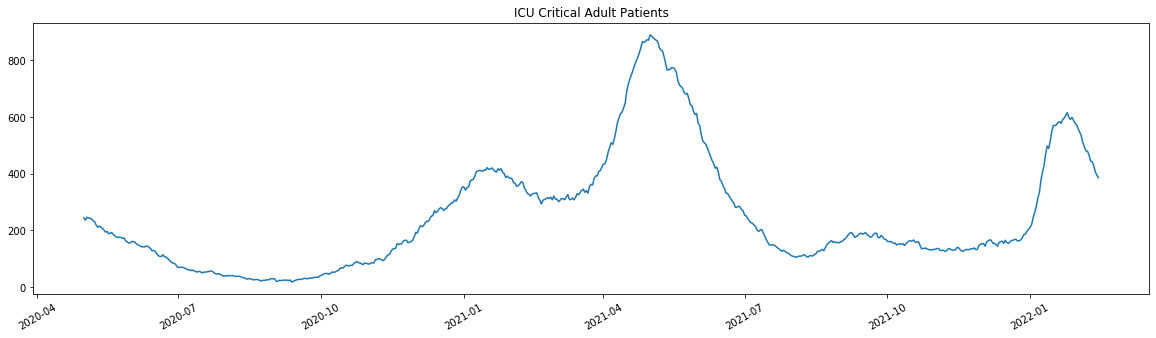

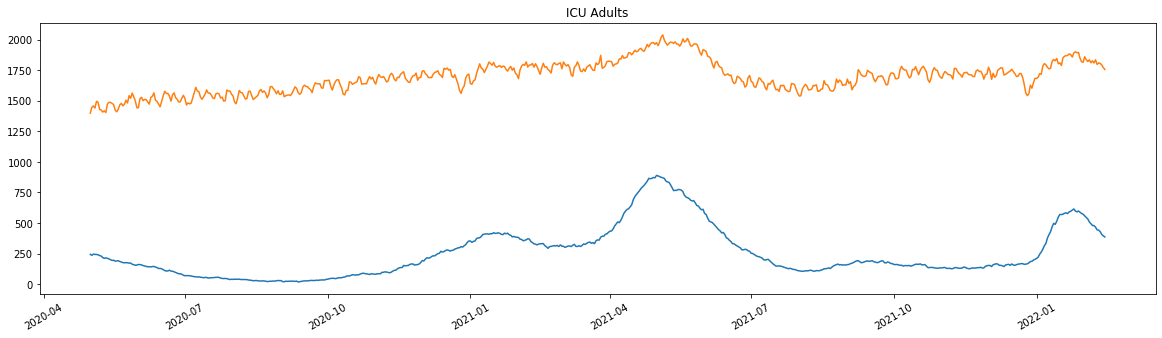

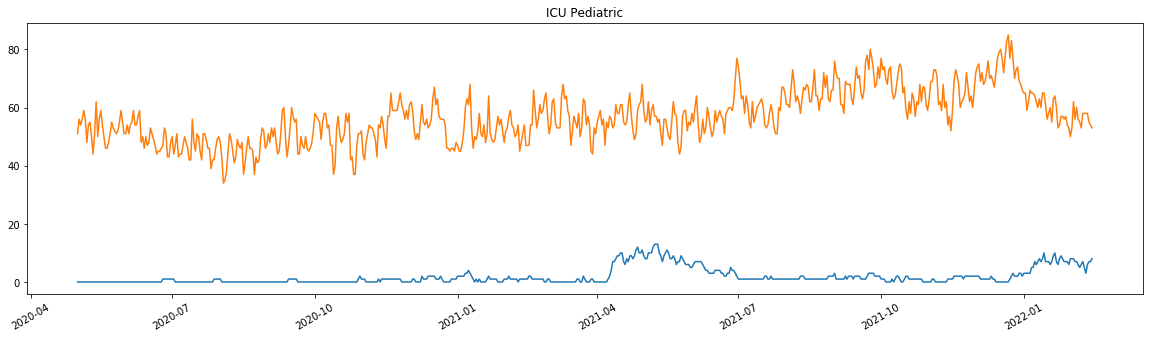

''

In [16]:
plt.plot(data[0:655]['adult_icu_crci_patients']) #main focus
plt.title('ICU Critical Adult Patients')
plt.xticks(rotation = 30)
plt.show()

# plt.plot(data[0:655])
# plt.xticks(rotation = 30)
# plt.show()


plt.plot(data.iloc[: , [0, 3]])
plt.title('ICU Adults')
plt.xticks(rotation = 30)
plt.show()

plt.plot(data.iloc[: , [5, 8]])
plt.title('ICU Pediatric')
plt.xticks(rotation = 30)
plt.show()
;

In [17]:
critpatientdf = (data.iloc[: , [0, 3, 5, 8]])
critpatientdf.head()
critpatientdf.describe()

,adult_icu_crci_patients,total_adult_icu_patients,ped_icu_crci_patients,total_ped_icu_patients
count,655.000000,655.000000,655.000000,655.000000
mean,251.783206,1691.693130,1.885496,56.813740
std,204.279555,127.422515,2.787700,8.847094
min,18.000000,1398.000000,0.000000,34.000000
25%,114.500000,1594.000000,0.000000,51.000000
50%,172.000000,1692.000000,1.000000,56.000000
75%,349.500000,1772.000000,2.000000,62.000000
max,889.000000,2038.000000,13.000000,85.000000


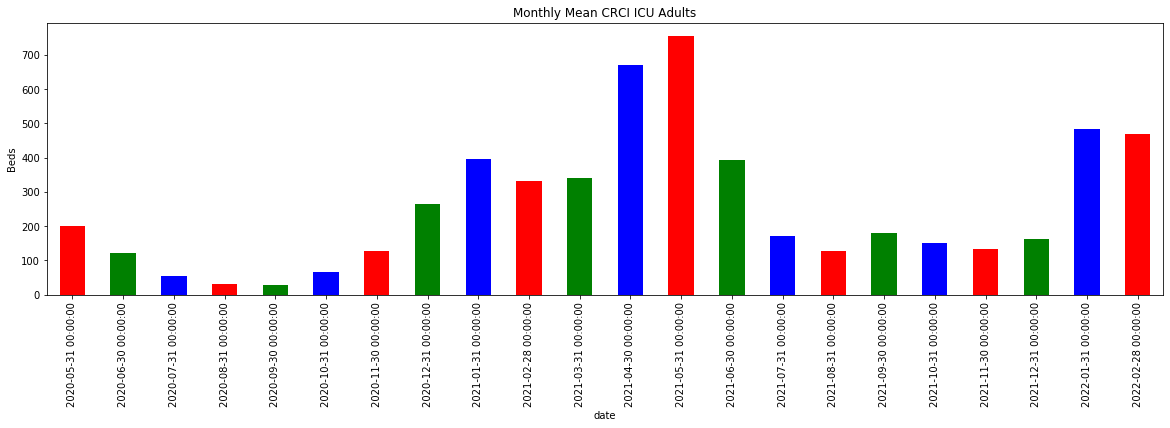

In [18]:
#mean, std per week
critpatientdf.resample(rule = 'w').mean()
critpatientdf['adult_icu_crci_patients'].resample(rule = 'm').mean().plot.bar(color=list('rgb'))
plt.title('Monthly Mean CRCI ICU Adults')
plt.ylabel('Beds')
rcParams['figure.figsize'] = 20, 5

In [19]:
#examine weekly std, mean
critpatientdf.resample(rule = 'w').std()
critpatientdf.resample(rule = 'w').mean()


,adult_icu_crci_patients,total_adult_icu_patients,ped_icu_crci_patients,total_ped_icu_patients
date,,,,
2020-05-03,242.000000,1433.666667,0.000000,53.666667
2020-05-10,231.285714,1442.714286,0.000000,54.000000
2020-05-17,201.714286,1459.714286,0.000000,53.714286
2020-05-24,182.142857,1459.428571,0.000000,49.857143
2020-05-31,164.714286,1511.142857,0.000000,53.571429
...,...,...,...,...
2022-01-23,581.142857,1856.857143,7.428571,59.000000
2022-01-30,596.142857,1871.142857,7.428571,55.428571
2022-02-06,527.428571,1828.428571,7.000000,56.000000


In [20]:
#bringing focus back on main variable
adultcrit = pd.DataFrame(data, columns=['adult_icu_crci_patients'])
# adultcrit.head()

In [21]:
#is data distributed in certain way? Quantile-quantile plot

In [22]:
import scipy.stats
import pylab

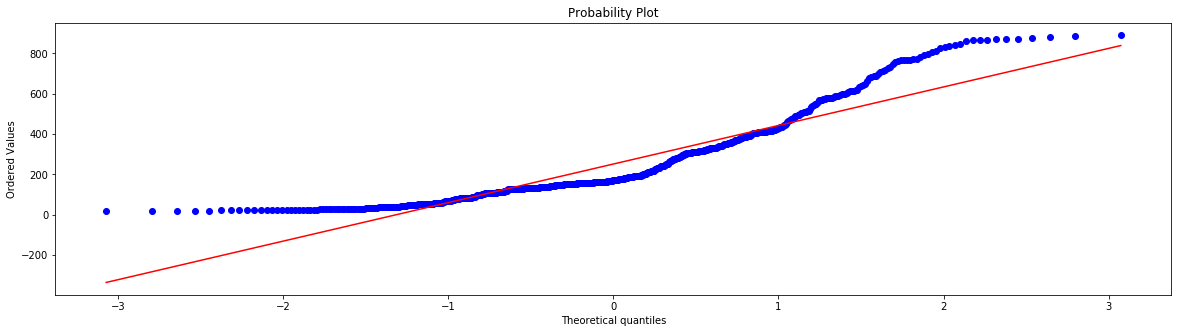

In [23]:
scipy.stats.probplot(df_ad1, plot = pylab)
pylab.show()

In [145]:
adultcrit.tail()

,adult_icu_crci_patients
date,
2022-02-10,442
2022-02-11,429
2022-02-12,407
2022-02-13,395
2022-02-14,386


# Stationarity check 

In [24]:
#Test for stationarity
from statsmodels.tsa.stattools import adfuller

In [25]:
adfuller(adultcrit.adult_icu_crci_patients.values)

(-2.415029400292789,
 0.13753932582040573,
 17,
 637,
 {'1%': -3.44065745275905,
  '5%': -2.8660879520543534,
  '10%': -2.5691919933016076},
 4278.403262572921)

In [26]:
#Null hypothesis is that H0= non-stationary
adfuller_result = adfuller(adultcrit.adult_icu_crci_patients.values, autolag = 'AIC')

print (f'ADF Stat: {adfuller_result[0]}')
print (f'p-value: {adfuller_result[1]}')

for k, v in adfuller_result[4].items():
    print('Critical Value:')
    print(f'{k}, {v}')
#DickeyFuller shows data is not stationary

ADF Stat: -2.415029400292789
p-value: 0.13753932582040573
Critical Value:
1%, -3.44065745275905
Critical Value:
5%, -2.8660879520543534
Critical Value:
10%, -2.5691919933016076


In [27]:
# Check for additive/ multiplicative components of adult_icu_crci_patients

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

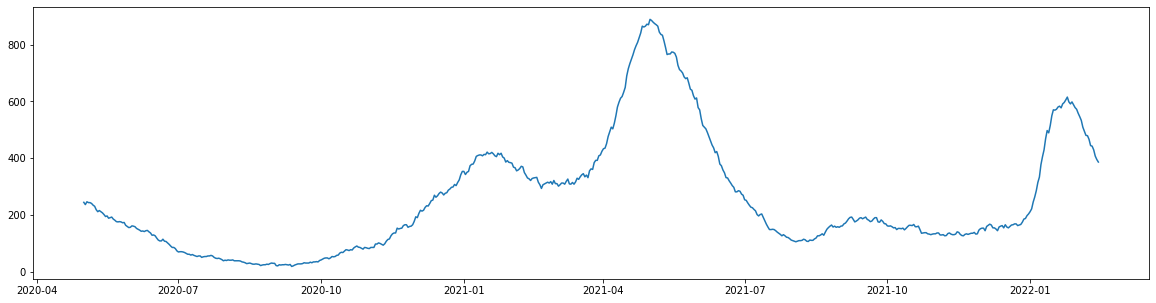

In [29]:
plt.plot(adultcrit)

In [30]:
#appears at first glance to be a slight upward trend, 
#Begin stationarity check with finding multiplicative components

In [31]:
mul_result = seasonal_decompose(adultcrit['adult_icu_crci_patients'], model = "multiplicative")

add_result = seasonal_decompose(adultcrit['adult_icu_crci_patients'], model = "additive")


Text(0.5, 0.98, '\n Multiplicative Decompose')

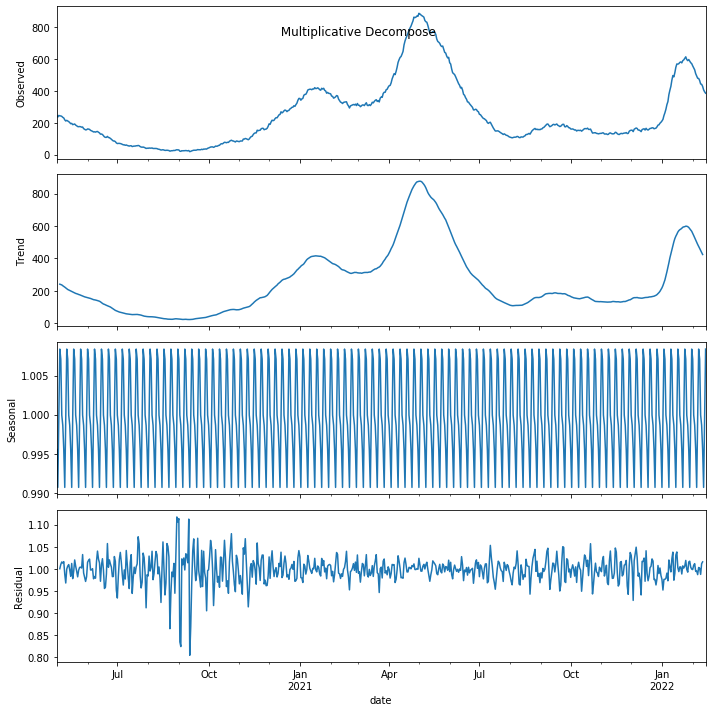

In [32]:
plt.rcParams.update({'figure.figsize': (10,10)})
mul_result.plot().suptitle('\n Multiplicative Decompose', fontsize = 12)

Text(0.5, 0.98, '\n Additive Decompose')

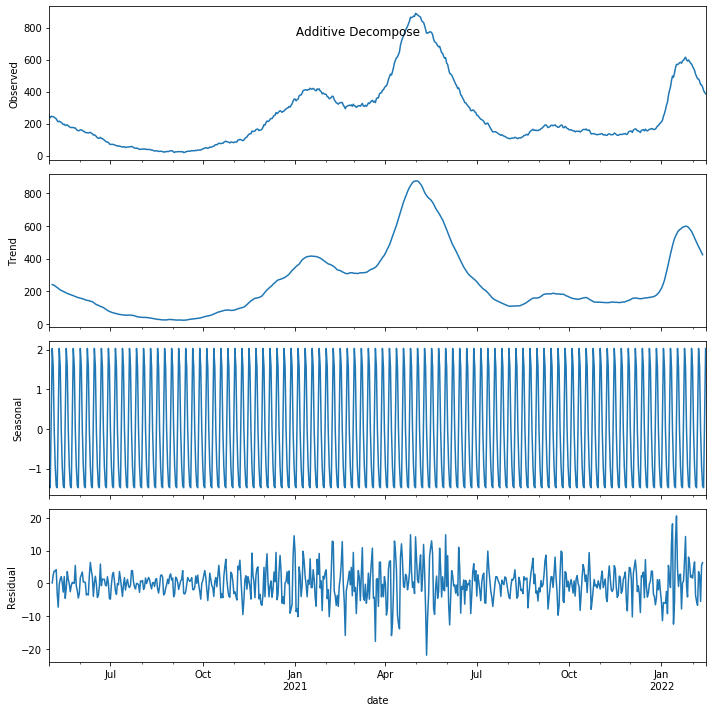

In [33]:
#shows not much seasonality in both, considerable residual in additive model.

#Additive
plt.rcParams.update({'figure.figsize': (10,10)})
add_result.plot().suptitle('\n Additive Decompose', fontsize = 12)
#shows trend once again, not much seasonality, resid?

In [34]:
multi_adcrit_new = pd.concat([mul_result.seasonal, mul_result.trend, mul_result.resid, mul_result.observed], axis=1)
multi_adcrit_new.columns = ['Seasonality', 'Trend', 'Residual', 'Actual Values']
multi_adcrit_new.head(6)
multi_adcrit_new.tail(6)

,Seasonality,Trend,Residual,Actual Values
date,,,,
2022-02-09,0.999947,449.571429,0.987660,444
2022-02-10,0.998651,437.428571,1.011816,442
2022-02-11,0.995552,424.142857,1.015971,429
2022-02-12,0.990706,NaN,NaN,407
2022-02-13,0.999655,NaN,NaN,395
2022-02-14,1.008388,NaN,NaN,386


In [35]:
add_adcrit_new = pd.concat([add_result.seasonal, add_result.trend, add_result.resid, add_result.observed], axis=1)
add_adcrit_new.columns = ['Seasonality', 'Trend', 'Residual', 'Actual Values']
add_adcrit_new.head(6)
add_adcrit_new.tail(6)

,Seasonality,Trend,Residual,Actual Values
date,,,,
2022-02-09,-0.020256,449.571429,-5.551173,444
2022-02-10,-0.948059,437.428571,5.519487,442
2022-02-11,-1.436538,424.142857,6.293681,429
2022-02-12,-1.481152,NaN,NaN,407
2022-02-13,0.289035,NaN,NaN,395
2022-02-14,2.031972,NaN,NaN,386


In [36]:
#additive and multiplicative components show that there is a trend, additive decompose shows more variation during the spikes in data,
#multiplicative considers more variation during the more stable components 
#Does this mean that the data is more additive than multiplicative? 
#additive considers the spikes as irregularities while seeing the data if it was multiplicative it would consider the more stable periods as more irregular.

## Making Stationary

In [37]:
#Log transformation to make stationary

In [84]:
size = int(len(adultcrit)*.8)
adtrain = adultcrit.iloc[:size]
adtest = adultcrit.iloc[size:]

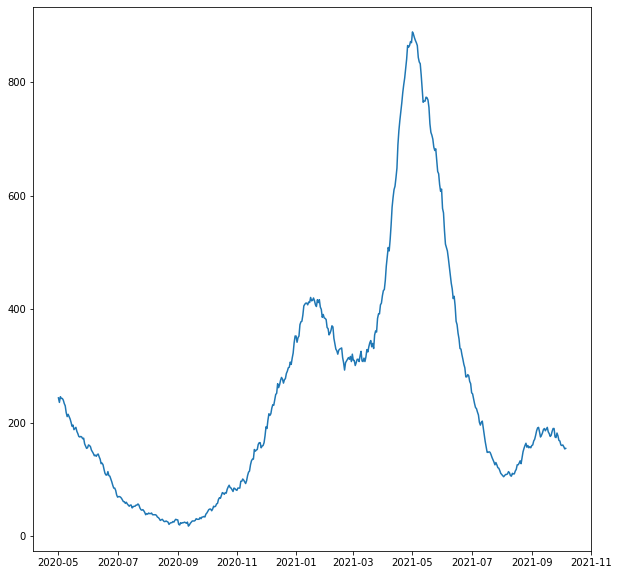

In [85]:
plt.plot(adtrain)

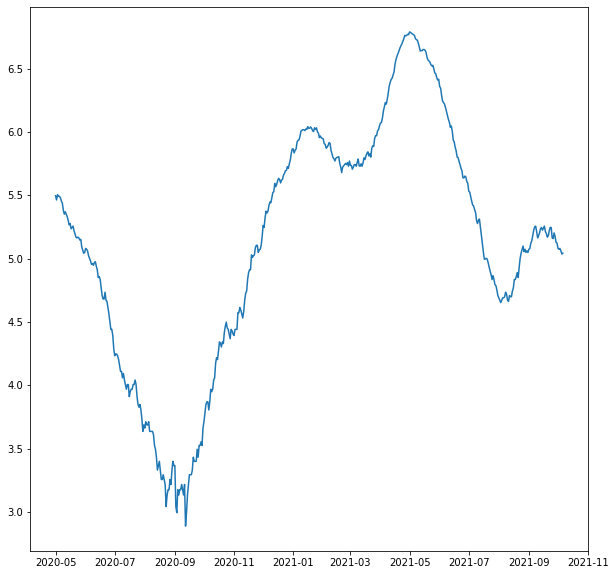

In [86]:
logadc = np.log(adtrain)
plt.plot(logadc)

In [87]:
adfuller(logadc.adult_icu_crci_patients)

(-1.9073238991561847,
 0.3286236003627644,
 11,
 512,
 {'1%': -3.443186695642769,
  '5%': -2.86720156693697,
  '10%': -2.569785402984619},
 -1760.4569422020272)

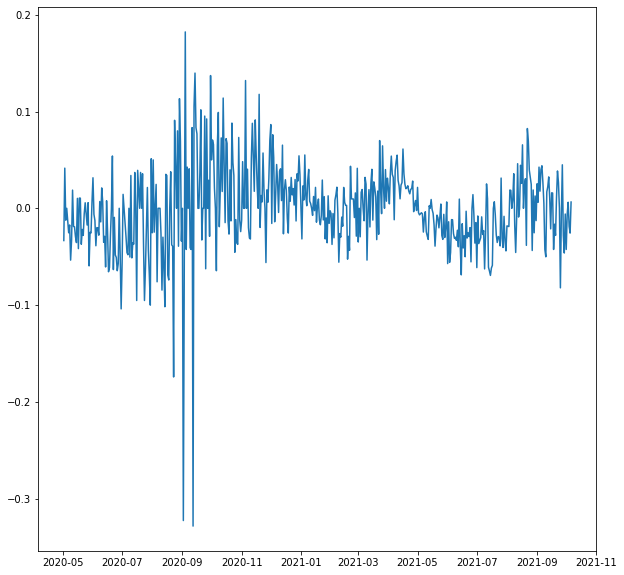

In [154]:
#after log transformation still not stationary
adclogdiff = logadc - logadc.shift()
plt.plot(adclogdiff)

In [157]:
# type(adclogdiff)
adclogdiff.info
# adclogdiff.columns

<bound method DataFrame.info of             adult_icu_crci_patients
date                               
2020-05-01                      NaN
2020-05-02                -0.033336
2020-05-03                 0.041500
2020-05-04                -0.012270
2020-05-05                 0.000000
...                             ...
2021-10-02                -0.006231
2021-10-03                 0.006231
2021-10-04                -0.018809
2021-10-05                -0.025642
2021-10-06                 0.006473

[524 rows x 1 columns]>

In [122]:
adclogdiff.tail()

,adult_icu_crci_patients
date,
2021-10-02,-0.006231
2021-10-03,0.006231
2021-10-04,-0.018809
2021-10-05,-0.025642
2021-10-06,0.006473


In [93]:
adclogdiff.isnull().values.any()
adclogdifff = adclogdiff.dropna()

In [94]:
adfuller(adclogdifff.adult_icu_crci_patients.values, autolag = 'AIC')
#pvalue now 0.047654937207315055, is stationary, H0 rejected at the 10% and 5% confidence level but not at 1%

(-2.880566763117846,
 0.047654937207315055,
 10,
 512,
 {'1%': -3.443186695642769,
  '5%': -2.86720156693697,
  '10%': -2.569785402984619},
 -1754.4967971405886)

In [95]:
##AutoCorrelation Function analyze time dependencies
import statsmodels.graphics.tsaplots as sgt

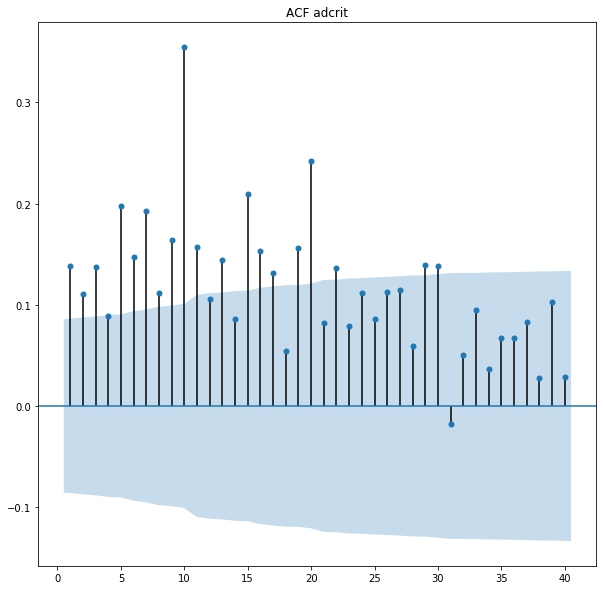

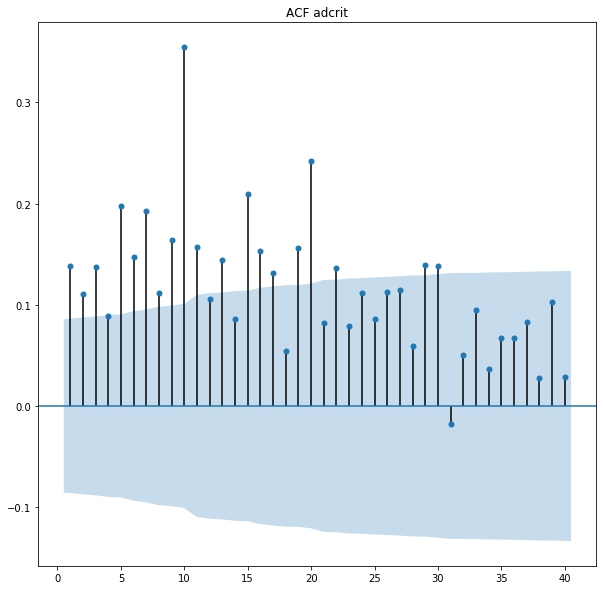

In [96]:
#standard lag is 40? zero false to include current values, correlation and itself = 1 bc timeseries
sgt.plot_acf(adclogdifff, lags = 40, zero = False, title = 'ACF adcrit')
#order starting p = 1 
#Can see significance is less after 22 periods

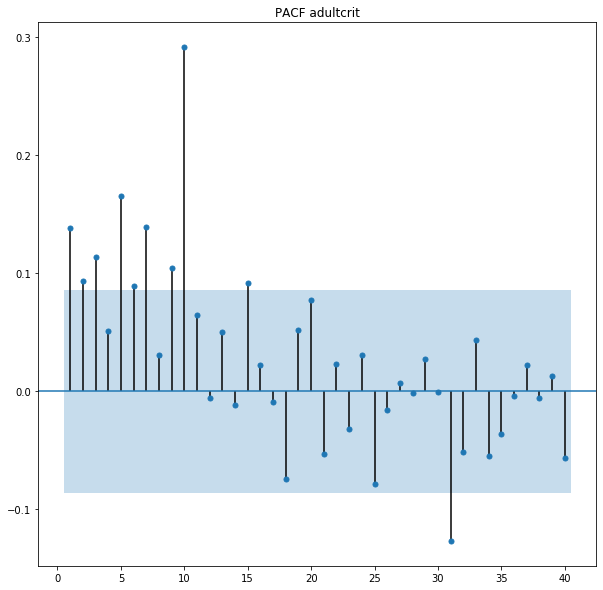

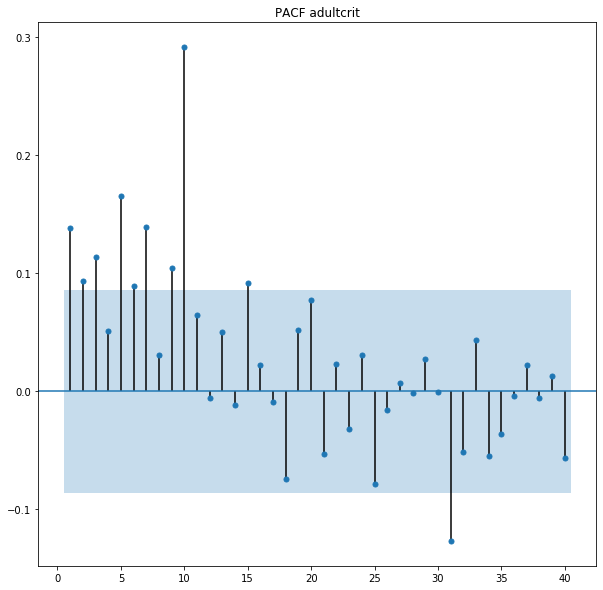

In [97]:
#using OLS for the corr
sgt.plot_pacf(adclogdifff, lags = 40, zero = False, method = "ols",  title ='PACF adultcrit')
#starting q =1
#direct corr stops being significant after ~10 periods

# ARIMA

In [68]:
from statsmodels.tsa.arima_model import ARIMA

In [98]:
#(1,1,1)
model_order1 = ARIMA(adclogdifff, order = (1,1,1), freq = 'd')
results_order1 = model_order1.fit()
results_order1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ARIMA Model Results                                 
=====================================================================================
Dep. Variable:     D.adult_icu_crci_patients   No. Observations:                  522
Model:                        ARIMA(1, 1, 1)   Log Likelihood                 902.993
Method:                              css-mle   S.D. of innovations              0.043
Date:                       Thu, 03 Mar 2022   AIC                          -1797.986
Time:                               16:10:17   BIC                          -1780.955
Sample:                           05-03-2020   HQIC                         -1791.316
                                - 10-06-2021                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            1.344e-05      0.000      0.094      0.925      -0.000       0.000
ar.L1.D.adult_icu_crci_patients    -0.0342      0.046     -0.738      0.461      -0.125       0.057
ma.L1.D.adult_icu_crci_patients    -0.9233      0.016    -57.323      0.000      -0.955      -0.892
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -29.2468           +0.0000j           29.2468            0.5000
MA.1            1.0831           +0.0000j            1.0831            0.0000
-----------------------------------------------------------------------------
"""

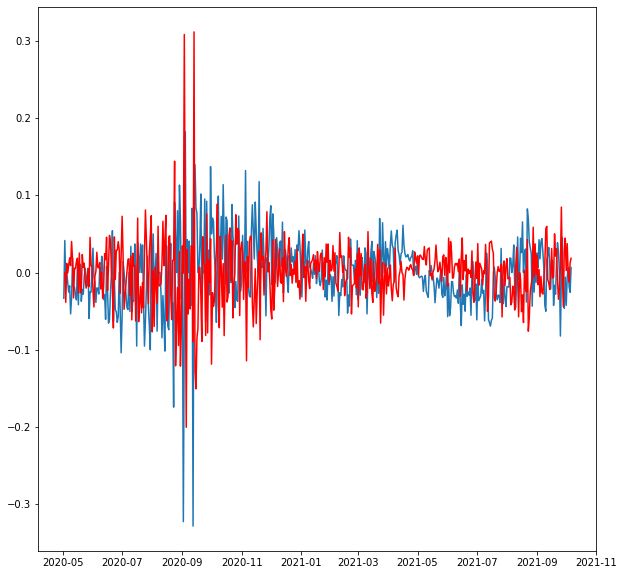

In [100]:
plt.plot(adclogdiff)
plt.plot(results_order1.fittedvalues, color='red')

In [102]:
#(2,1,1)
model_order211 = ARIMA(adclogdifff, order = (2,1,0), freq = 'd')
results_order211 = model_order211.fit()
results_order211.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ARIMA Model Results                                 
=====================================================================================
Dep. Variable:     D.adult_icu_crci_patients   No. Observations:                  522
Model:                        ARIMA(2, 1, 0)   Log Likelihood                 836.410
Method:                              css-mle   S.D. of innovations              0.049
Date:                       Thu, 03 Mar 2022   AIC                          -1664.819
Time:                               16:12:08   BIC                          -1647.789
Sample:                           05-03-2020   HQIC                         -1658.149
                                - 10-06-2021                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                           -5.929e-06      0.001     -0.006      0.996      -0.002       0.002
ar.L1.D.adult_icu_crci_patients    -0.6510      0.041    -15.855      0.000      -0.731      -0.571
ar.L2.D.adult_icu_crci_patients    -0.3462      0.041     -8.438      0.000      -0.427      -0.266
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.9401           -1.4158j            1.6995           -0.3433
AR.2           -0.9401           +1.4158j            1.6995            0.3433
-----------------------------------------------------------------------------
"""

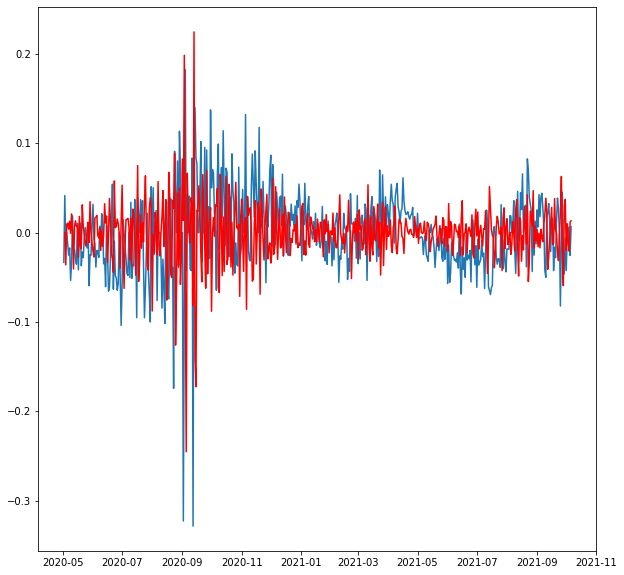

In [104]:
plt.plot(adclogdifff)
plt.plot(results_order211.fittedvalues, color='red')

In [73]:
##return results back to scale

In [119]:
pred_arima_diff = results_order211.fittedvalues
pred_arima_diff.head()

date
2020-05-03   -0.000006
2020-05-04   -0.036198
2020-05-05    0.009082
2020-05-06    0.010617
2020-05-07    0.003827
Freq: D, dtype: float64

In [105]:
# pred_arima_diff = pd.Series(results_order211.fittedvalues, copy = True)
# pred_arima_diff.head()

date
2020-05-03   -0.000006
2020-05-04   -0.036198
2020-05-05    0.009082
2020-05-06    0.010617
2020-05-07    0.003827
Freq: D, dtype: float64

In [120]:
pred_arima_diff_cumsum = pred_arima_diff.cumsum()
pred_arima_diff_cumsum.head()


date
2020-05-03   -0.000006
2020-05-04   -0.036204
2020-05-05   -0.027122
2020-05-06   -0.016505
2020-05-07   -0.012678
Freq: D, dtype: float64

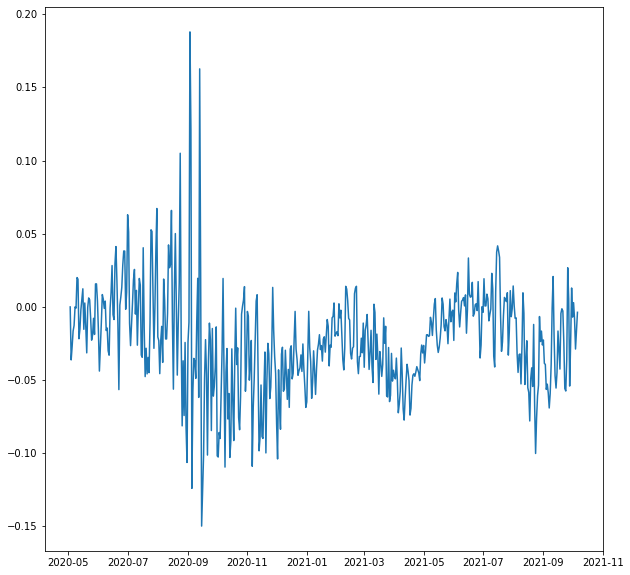

In [127]:
plt.plot(pred_arima_diff_cumsum)
# plt.plot(logadc)

In [146]:
pred_arima_log = np.exp(pred_arima_diff_cumsum)
# pred_arima_log = pd.Series(logadc.iloc[0], index = logadc.index)
# pred_arima_log = pred_arima_log.add(pred_arima_diff_cumsum, fill_value = 0)
# pred_arima_log.head()

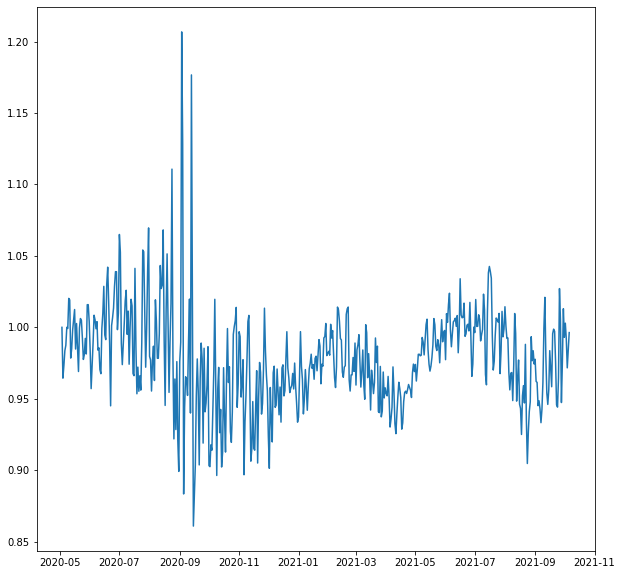

In [147]:
plt.plot(pred_arima_log)

In [142]:
prediction = results_order211.predict(500)

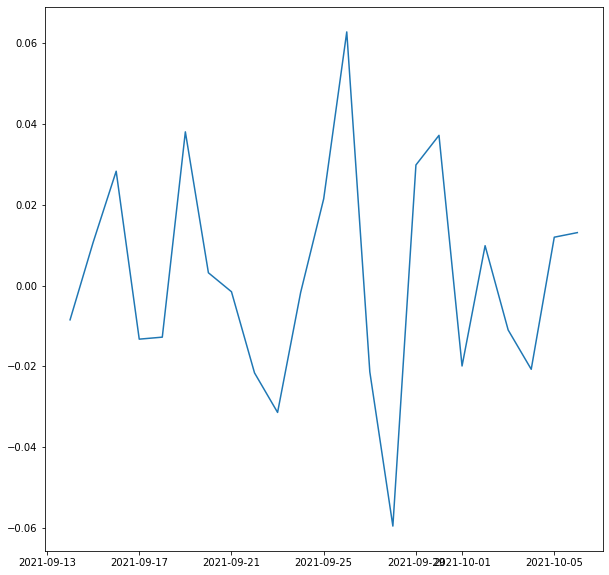

In [143]:
plt.plot(prediction)

last_energy=results_order211.iloc[-1]

df['energy']=(np.exp(model_order211.cumsum())*last_energy)

#experiementing

arimapredictions = np.exp(pred_arima_log)
logadc - logadc.shift()

In [58]:
#rolling average, showing changes in the number of critical ICU patients per week
# critpatientdf['adult_icu_crci_patients'].plot(figsize=(20,5))
# critpatientdf.rolling(window=50).mean()['adult_icu_crci_patients'].plot()

In [59]:
# new = data.iloc[: , [0, 6, 7]].copy() 
# newdata = pd.Series([data.date, data.adult_icu_crci_patients, data.total_adult_icu_patients, data.ped_icu_crci_patients, data.total_ped_icu_patients]).transpose()


In [60]:
# plt.plot(data[0:655]['adult_icu_crci_patients''available_adult_icu_beds''total_adult_icu_patients'])
# plt.xticks(rotation = 30)
# plt.show()

In [61]:
adultcrit = pd.DataFrame(data, columns=['adult_icu_crci_patients'])
adultcrit.head()
type(adultcrit)

pandas.core.frame.DataFrame

In [62]:
import os
os.getcwd()

    

'C:\\Users\\Jneny\\Documents\\CIND 820\\Hospitalcapacity'